# How to properly prevent overfitting

**Objective**
- Give a validation set to the model
- Use the stopping criterion to prevent the Neural network from overfitting
- Regularize your network

## Data 

First, let's generate some data thanks to the [`make_blob`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function that we used yesterday.

❓ **Question** ❓ Generate 2000 samples, with 10 features each. There should be 8 classes of blobs (`centers` argument), wich `cluster_std` equal to 7. Plot some dimensions to check your data.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=2000, n_features=10, centers=8, cluster_std=7)

In [3]:
X.shape

(2000, 10)

In [4]:
y.shape

(2000,)

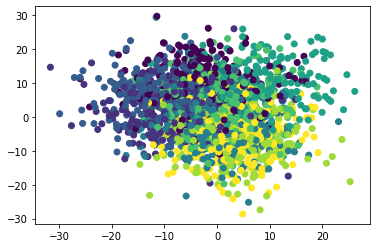

In [4]:
plt.scatter(X[:, 3], X[:, 6], c=y);

❓ **Question** ❓ Use the `to_categorical` function from `tensorflow` to convert `y` to `y_cat` which is the categorical representation of `y` with one-hot encoding columns.

In [5]:
import pandas as pd

In [6]:
pd.DataFrame(y).nunique()

0    8
dtype: int64

In [7]:
from tensorflow.keras.utils import to_categorical 

In [8]:
y_cat = to_categorical(y, num_classes=8)
y_cat.shape

(2000, 8)


## Part I : Proper cross-validation

In a previous challenge, we split the dataset into a train and a test set at the beginning of the notebook. And then, we started to build different models which were trained on the train set but evaluated on the test set.

So, at the end of the day, we used the test set as many times as we evaluated our models and different hyperparameters. We therefore _used_ the test set to select our best model, which is a sort of overfitting.

A first good practice is to avoid using `random_state` or any deterministic separation between your train and test set. In that case, your test set will change everytime you re-run your notebook. But this is far from being sufficient.

To properly compare models, you have to run a proper cross-validation, a 10-fold split for instance. Let's see how to do it properly.

❓ **Question** ❓ First, write a function that outputs a neural network with 3 layers
- a layer with 25 neurons, the `relu` activation function and the appropriate `input_dim`
- a layer with 10 neurons and the `relu` activation function.
- a last layer which is suited to the problem at hand (multiclass classification)

The function should include its compilation, with the `categorical_crossentropy` loss, the `adam` optimizer and the `accuracy` metrics.

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
def initialize_model():
    model = models.Sequential()
    
    model.add(layers.Dense(25, activation='relu', input_dim=10))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [11]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                275       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


Here, we will do a proper cross validation.

❓ **Question** ❓ Write a loop thanks to the [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function of Scikit-Learn (select 10 splits) to fit your model on the train data, and evaluate it on the test data. Store the result of the evaluation in the `results` variable.

Do not forget to standardize your train data before fitting the neural network.
Also, 150 epochs shoul be sufficient in a first approximation

In [12]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [13]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

results = []

for train_index, test_index in kf.split(X):

    # Split the data into train and test
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize the model
    model = initialize_model() 
    
    # Fit the model on the train data
    model.fit(X_train, 
              y_train,
              epochs=150,
              verbose=1)
    
    # Evaluate the model on the test data and append the result in the `results` variable
    results.append(model.evaluate(X_test, y_test))
    
results

TRAIN: [ 200  201  202 ... 1997 1998 1999] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Epoch 1/150
57/57 [==============================] - 1s 1ms/step - loss: 2.0619 - accuracy: 0.1457
Epoch 2/150
57/57 [====================

57/57 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8537
Epoch 75/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.8336
Epoch 76/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8488
Epoch 77/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.8337
Epoch 78/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8429
Epoch 79/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8371
Epoch 80/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8529
Epoch 81/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.8282
Epoch 82/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8460
Epoch 83/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8501
Epoch 84/150


57/57 [==============================] - 1s 1ms/step - loss: 2.0797 - accuracy: 0.1423
Epoch 2/150
57/57 [==============================] - 0s 1ms/step - loss: 1.8288 - accuracy: 0.3990
Epoch 3/150
57/57 [==============================] - 0s 1ms/step - loss: 1.5622 - accuracy: 0.5979
Epoch 4/150
57/57 [==============================] - 0s 1ms/step - loss: 1.2663 - accuracy: 0.6884
Epoch 5/150
57/57 [==============================] - 0s 5ms/step - loss: 0.9764 - accuracy: 0.7665
Epoch 6/150
57/57 [==============================] - 0s 3ms/step - loss: 0.7834 - accuracy: 0.7898
Epoch 7/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.7872
Epoch 8/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.8057
Epoch 9/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.8104
Epoch 10/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.8238
Epoch 11/150
57/57 [=

57/57 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8436
Epoch 83/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8349
Epoch 84/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8449
Epoch 85/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8604
Epoch 86/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8305
Epoch 87/150
57/57 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.8435
Epoch 88/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.8213
Epoch 89/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8618
Epoch 90/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8389
Epoch 91/150
57/57 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8609
Epoch 92/150


57/57 [==============================] - 0s 1ms/step - loss: 1.5797 - accuracy: 0.5019
Epoch 4/150
57/57 [==============================] - 0s 1ms/step - loss: 1.2796 - accuracy: 0.6022
Epoch 5/150
57/57 [==============================] - 0s 1ms/step - loss: 1.0422 - accuracy: 0.6523
Epoch 6/150
57/57 [==============================] - 0s 1ms/step - loss: 0.8940 - accuracy: 0.7029
Epoch 7/150
57/57 [==============================] - 0s 1ms/step - loss: 0.7668 - accuracy: 0.7490
Epoch 8/150
57/57 [==============================] - 0s 1ms/step - loss: 0.7265 - accuracy: 0.7611
Epoch 9/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.7764
Epoch 10/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7939
Epoch 11/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7965
Epoch 12/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.8135
Epoch 13/150
57/57 

57/57 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8475
Epoch 85/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8406
Epoch 86/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8424
Epoch 87/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.8610
Epoch 88/150
57/57 [==============================] - 0s 9ms/step - loss: 0.4237 - accuracy: 0.8550
Epoch 89/150
57/57 [==============================] - 0s 8ms/step - loss: 0.4201 - accuracy: 0.8530
Epoch 90/150
57/57 [==============================] - 0s 6ms/step - loss: 0.4219 - accuracy: 0.8422
Epoch 91/150
57/57 [==============================] - 0s 7ms/step - loss: 0.4275 - accuracy: 0.8457
Epoch 92/150
57/57 [==============================] - 1s 21ms/step - loss: 0.4301 - accuracy: 0.8455 0s - loss: 0.4234 - 
Epoch 93/150
57/57 [==============================] - 0s 8ms/step - loss: 0.4036 - accuracy

57/57 [==============================] - 0s 1ms/step - loss: 1.1658 - accuracy: 0.6655
Epoch 6/150
57/57 [==============================] - 0s 1ms/step - loss: 0.9155 - accuracy: 0.7559
Epoch 7/150
57/57 [==============================] - 0s 1ms/step - loss: 0.7701 - accuracy: 0.7789
Epoch 8/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.7853
Epoch 9/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.8077
Epoch 10/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.8075
Epoch 11/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.8044
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.8155
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.8069
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.8061
Epoch 15/150
57/5

57/57 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8516
Epoch 88/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8565
Epoch 89/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8450
Epoch 90/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8582
Epoch 91/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8496
Epoch 92/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8690
Epoch 93/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8419
Epoch 94/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8554
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8560
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8503
Epoch 97/150


57/57 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.7775
Epoch 10/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.8156
Epoch 11/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.8098
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8031
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7931
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.8217
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.8204
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.8233
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.8218
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.8200
Epoch 19/150


57/57 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8577
Epoch 92/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8389
Epoch 93/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8464
Epoch 94/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8517
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8552
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8574
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8513
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8516
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8503
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8584
Epoch 101/15

57/57 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.7790
Epoch 11/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.8041
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.8010
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.7864
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.8105
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.8140
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.8124
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.8176
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.8271
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.8139
Epoch 20/150


57/57 [==============================] - 1s 11ms/step - loss: 0.4386 - accuracy: 0.8320
Epoch 93/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8534
Epoch 94/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8518
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8590
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.8471
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8536
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8616
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8399
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8409
Epoch 101/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8265
Epoch 102/

57/57 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.8244
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.8253
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.8117
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.8317
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.8154
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.8345
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8380
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.8164
Epoch 20/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.8223
Epoch 21/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8378
Epoch 22/150


57/57 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8580
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8496
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8613
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8791
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8566
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8657
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8584
Epoch 101/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8485
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8509
Epoch 103/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8556
Epoch 104

57/57 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7829
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7940
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.8230
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5386 - accuracy: 0.8010
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.8077
Epoch 19/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8126
Epoch 20/150
57/57 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.8192
Epoch 21/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.8045
Epoch 22/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.8230
Epoch 23/150
57/57 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.8065
Epoch 24/150


57/57 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8486
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8456
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8344
Epoch 99/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8509
Epoch 100/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8485
Epoch 101/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8486
Epoch 102/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8467
Epoch 103/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8426
Epoch 104/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8468
Epoch 105/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8498
Epoch 1

57/57 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8082
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.8015
Epoch 18/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8078
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.8143
Epoch 20/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7969
Epoch 21/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.8363
Epoch 22/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8277
Epoch 23/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.8215
Epoch 24/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8367
Epoch 25/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.8199
Epoch 26/150


57/57 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8598
Epoch 99/150
57/57 [==============================] - 0s 9ms/step - loss: 0.4123 - accuracy: 0.8552: 3s - loss: 0.4893 - accuracy: 
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8552
Epoch 101/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8543
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8607
Epoch 103/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8398
Epoch 104/150
57/57 [==============================] - 1s 11ms/step - loss: 0.4274 - accuracy: 0.8421
Epoch 105/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8554
Epoch 106/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8620
Epoch 107/150
57/57 [==============================] - 0s 1ms/step - loss

57/57 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.8224
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.8291
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8318
Epoch 20/150
57/57 [==============================] - 1s 10ms/step - loss: 0.4854 - accuracy: 0.8310 4s - loss: 0.5353 - accuracy: 0.76 - ETA: 5s - loss: 0.5345 - accura
Epoch 21/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8313
Epoch 22/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.8090
Epoch 23/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8328
Epoch 24/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8365
Epoch 25/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8266
Epoch 26/150
57/57 [=======================

57/57 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8479
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8539
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8611
Epoch 101/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8532
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8641
Epoch 103/150
57/57 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8488
Epoch 104/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8593
Epoch 105/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8607
Epoch 106/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8519
Epoch 107/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8669
Epoch

[[0.42971664667129517, 0.8500000238418579],
 [0.49515870213508606, 0.8299999833106995],
 [0.5610909461975098, 0.7950000166893005],
 [0.5806044936180115, 0.7950000166893005],
 [0.6382144689559937, 0.8199999928474426],
 [0.5164540410041809, 0.8299999833106995],
 [0.7773803472518921, 0.75],
 [0.6925955414772034, 0.7950000166893005],
 [0.6069331169128418, 0.7799999713897705],
 [0.7382988929748535, 0.7799999713897705]]

In [14]:
results

[[0.42971664667129517, 0.8500000238418579],
 [0.49515870213508606, 0.8299999833106995],
 [0.5610909461975098, 0.7950000166893005],
 [0.5806044936180115, 0.7950000166893005],
 [0.6382144689559937, 0.8199999928474426],
 [0.5164540410041809, 0.8299999833106995],
 [0.7773803472518921, 0.75],
 [0.6925955414772034, 0.7950000166893005],
 [0.6069331169128418, 0.7799999713897705],
 [0.7382988929748535, 0.7799999713897705]]

❓ **Question** ❓ Print the mean accuracy, and its standard deviation

In [15]:
mean, std = np.array(results)[1].mean(), np.array(results)[1].std()
mean, std

(0.6625793427228928, 0.1674206405878067)

❗ **Remark** ❗ You probably encountered one of the drawback of using a proper cross-validation for a neural network: **it takes a lot of time**. Therefore, for the rest of deep-learning module, we will do **only one split**. But remember that this is not entirely correct and, for real-life applications and problems, you are encouraged to use a proper cross-validation technique.

❗ **Remark** ❗ In general, what practitioners do, is that they split only once, as you did. And once they get to the end of their optimization, they launch a real cross-validation at 6pm, go home and get the final results on the next day.

❓ **Question** ❓ For the rest of the exercise (and of the deep-learning module), split the dataset into train and test with a 70/30% training to test data ratio.



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

## Part II : Stop the learning before overfitting

Let's first show that if we train the model for too long, it will overfit the training data and will not be good on the test data.

❓ **Question** ❓ To do that, train the same neural network (do not forget to re-initialize it) with `validation_data=(X_test, y_test)` and 500 epochs. Store the history in the `history` variable.

In [17]:
model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=500,
                    verbose=0)
history

❓ **Question** ❓ Evaluate the model on the test set and print the accuracy

In [18]:
model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 0s 1ms/step - loss: 1.6840 - accuracy: 0.7500


[1.6840077638626099, 0.75]

❓ **Question** ❓ Plot the history of the model with the following function : 

In [19]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(13,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    if title:
        fig.suptitle(title)

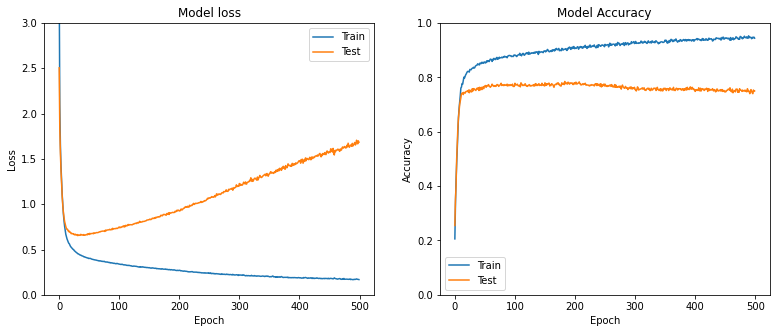

In [20]:
plot_loss_accuracy(history)

We clearly see that the number of epochs we choose has a great influence on the final results: 
- If not enough epochs, then the algorithm is not optimal as it has not converged yet. 
- On the other hand, if too many epochs, we overfit the training data and the algorithm does not generalize well on test data.

What we want is basically to stop the algorithm when the test loss is minimal (or the test accuracy is maximal).

Let's introduce the early stopping criterion which is a way to stop the epochs of the algorithm at a interesting epoch. It basically use part of the data to see if the test loss stops from improving. You cannot use the test data to check that, otherwise, it is some sort of data leakage. On the contrary, it uses a subset of the initial training data, called the **validation set**

It basically looks like the following : 

<img src="validation_set.png" alt="Validation set" style="height:350px;"/>

To split this data, we use, in the `fit` function, the `validation_split` keyword which sets the percentage of data from the initial training set used in the validation set. On top of that, we use the `callbacks` keyword to call the early stopping criterion at the end of each epoch. You can check additional information in the [documentation](https://www.tensorflow.org/guide/keras/train_and_evaluate)


❓ **Question** ❓ Launch the following code, plot the history and evaluate it on the test set

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model = initialize_model()

# Fit the model on the train data
history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=0, 
                    callbacks=[es])

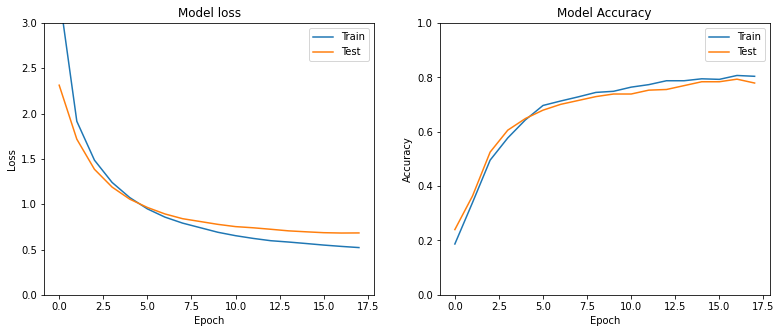

In [22]:
plot_loss_accuracy(history)

In [23]:
model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 0s 873us/step - loss: 0.6731 - accuracy: 0.7800


[0.6731067895889282, 0.7799999713897705]

❗ **Remark** ❗ The problem, with this type of approach, is that as soon as the loss of the validation set increases, the model stops. However, as neural network convergence is stochastic, it happens that the loss increases before decreasing again. For that reason, the Early Stopping criterion has the `patience` keyword that defines how many epochs without loss decrease you allow.

❓ **Question** ❓ Use the early stopping criterion with a patience of 30 epochs, plot the results and print the accuracy on the test set

In [24]:
es = EarlyStopping(patience=30)

model = initialize_model()

# Fit the model on the train data
history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=0, 
                    callbacks=[es])

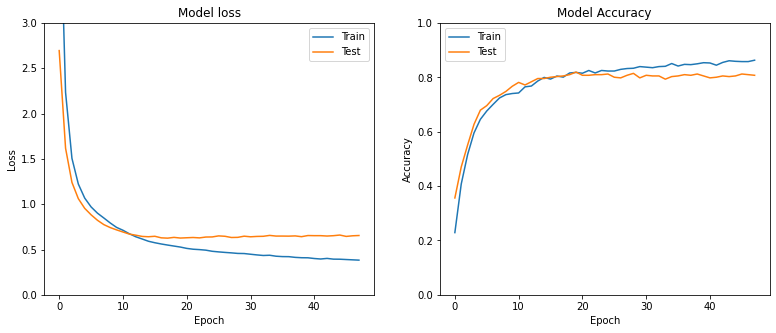

In [25]:
plot_loss_accuracy(history)

In [26]:
model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.7750


[0.6900185346603394, 0.7749999761581421]

❗ **Remark** ❗ The model continues to converge even though it has some loss increase and descrease. The number of patience epochs to select is highly related to the task at hand and there does not exist any general rule. 

❗ **Remark** ❗ In case you select a high patience, you might face the problem that the loss on the test set decrease a lot from the best position. To that end, the early stopping criterion allows you to stop the convergence _and_ restore the weights of the neural network when it had the best score on the validation set, thanks to the `restore_best_weights` that is set to `False` by default.

❓ **Question** ❓ Run the model with a early stopping criterion that enables to restore the best weights of the parameters, plot the loss and accuracy and print the accuracy on the test set

In [27]:
es = EarlyStopping(patience=30, restore_best_weights=True)

model = initialize_model()

# Fit the model on the train data
history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=0, 
                    callbacks=[es])

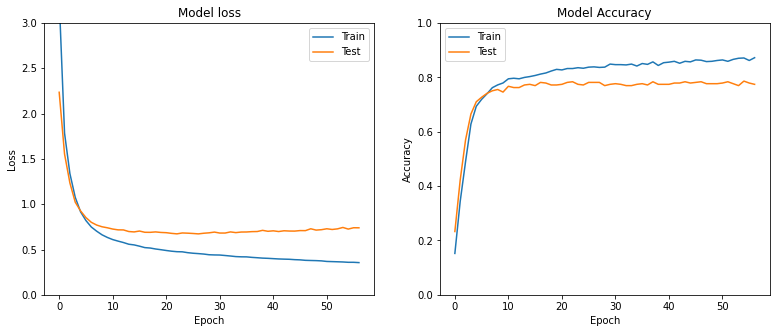

In [28]:
plot_loss_accuracy(history)

In [29]:
model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.7750


[0.6940073370933533, 0.7749999761581421]

❗ **Remark 1** ❗ You can look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) to play with other parameters

❗ **Remark 2** ❗ No need to take a look at the epochs as long as it hit the stopping criterion. So, in the future, you should have a large number of epochs and the early stopping criterion has to stop the epochs. 

## Part III : Batch-size & Epochs

❓ **Question** ❓ Let's run the previous model with different batch sizes (with the early stopping criterion) and plot the results.

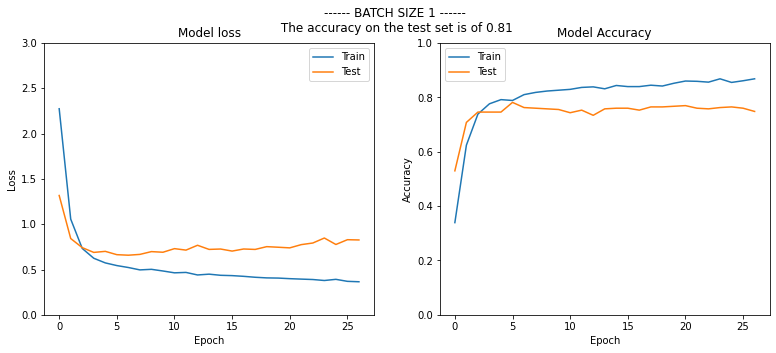

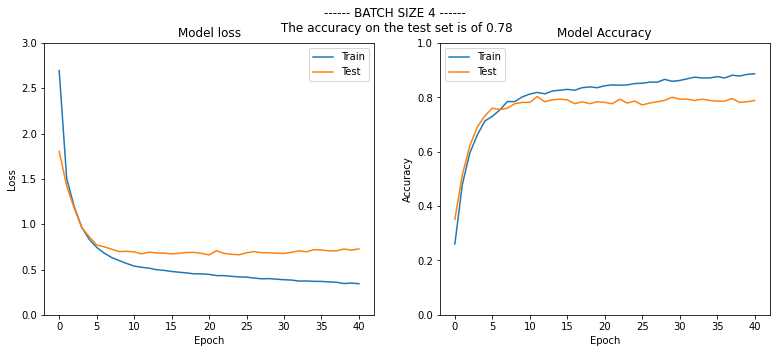

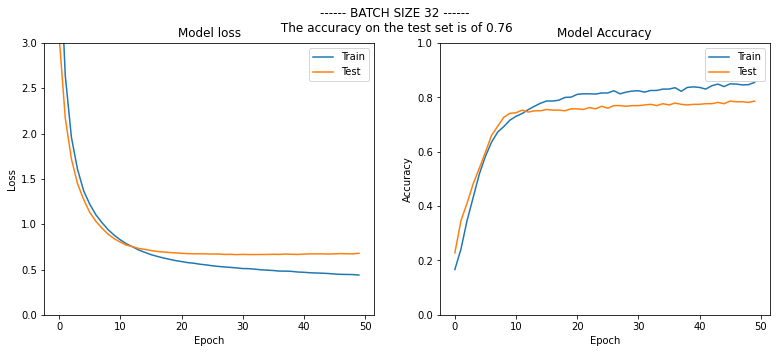

In [30]:
# RUN THIS CELL (it can take some time)

es = EarlyStopping(patience=20, restore_best_weights=True)

for batch_size in [1, 4, 32]:
    
    model = initialize_model()

    history = model.fit(X_train, y_train,
                        validation_split=0.3,
                        epochs=500,
                        batch_size=batch_size, 
                        verbose=0, 
                        callbacks=[es])

    results = model.evaluate(X_test, y_test, verbose=0)
    plot_loss_accuracy(history, title=f'------ BATCH SIZE {batch_size} ------\n The accuracy on the test set is of {results[1]:.2f}')

❓ **Question** ❓ Look at the oscillations of the accuracy and loss with respect to the batch size number. Is this coherent with what we saw with the Tensorflow Playground? 

In [31]:
# ===> The increase of the batch-size smouths out the prediction but the test loss does not decrease. 
# ===> This is coherent.

❓ **Question** ❓ How many optimizations of the weight are they within one epoch, with respect to the number of data and the batch size? Therefore, is one epoch longer with a large or a small bacth size?

In [32]:
# ===> Within one epoch, there are n=number_of_data optimizations when the batch_size=1 
#      and n=number_of_data / batch_size optimizations when batch_size>1.
# ===> One epoch is longer with a large batch_size since it will need all the optimizations 
#      to be completed in the batch before updating the weights.

# Part IV: Regularization

In this part of the notebook, we will see how to use regularizers in a neural network. Regularizers are used to prevent overfitting that can happen because very complex networks have many many parameters which tends to overfit the training data.

First, let's initialize a model that has too many parameters for the task (many layers and/or many neurons) such that it overfits the training data  
**To better see the effect, we will not use any early stopping criterion**

The accuracy on the test set is of 0.71


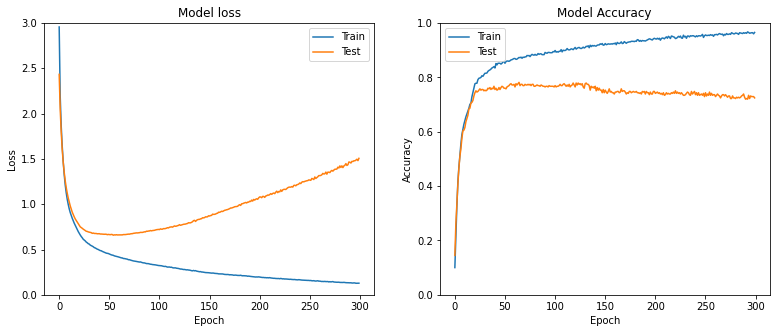

In [33]:
# RUN THIS CELL

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_split=0.3,
                    epochs=300, batch_size=batch_size, verbose=0)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

☝️ In our overparametrized network, some neurons got too specific to given training data, preventing the network from generalizing to new data. This lead to some overfitting. 

For that reason, we will use 
- [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers, whose role is to _cancel_ the output of some neurons  during the training part. By doing this at random, it prevents the network from getting too specific to the input data : no any neuron can be too specific to a given input as its output is sometimes cancelled by the dropout layer. Overall, it forces the information that is contain in one input sample to go through multiple neurons instead of only one specific.

- [`Regularizers`](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers), as in linear regression regularization where the weights of the linear regression are constrained by L1, L2 or L1 and L2 norms.

❓ **Question** ❓ Try adding dropout layers and regularization to all your layers of the above neural network and look at the effect on the loss on the test set.

In [34]:
from tensorflow.keras import regularizers

reg_l1 = regularizers.L1(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

The accuracy on the test set is of 0.77


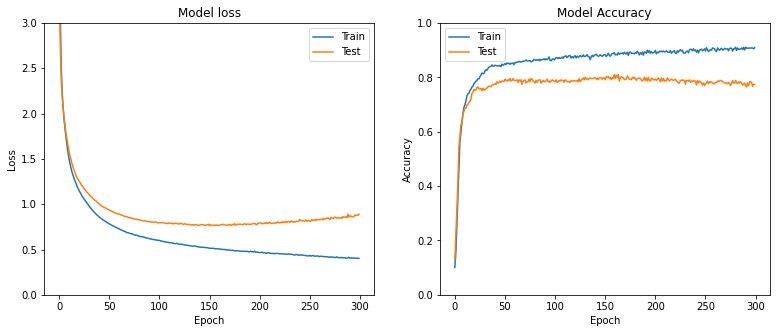

In [35]:
# Regularizers

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10, kernel_regularizer=reg_l1))
model.add(layers.Dense(10, activation='relu', activity_regularizer=reg_l1_l2))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_split=0.3,
                    epochs=300, batch_size=batch_size, verbose=0)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

The accuracy on the test set is of 0.79


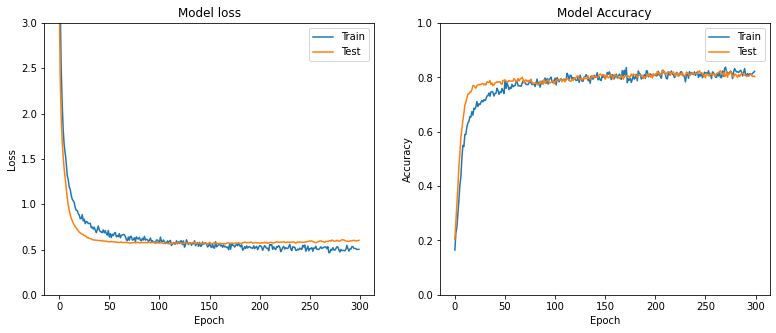

In [36]:
# Dropouts

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_split=0.3,
                    epochs=300, batch_size=batch_size, verbose=0)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

🏁 **Congratulation** 

Don't forget to commit and push your challenge